
# **Example 4.2.2 (Image convolutions)**

In this example we illustrate the convolution in an image executed with the torch package.


## Imports and image read

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import imageio
from PIL import Image
import torchvision.transforms as T
# from google.colab import drive
# drive.mount('/content/gdrive') # This is for Google Collab

# Read input image
img = Image.open('Data/Apple_cup.jpg')

img=img.convert(mode='L') # The original image is RGB. In this example, the
                          # image is converted to grayscale using this method.



# We also define an auxiliary function to print things.
def print_images(O):
  # The input is supposed to be a tensor with dimensions [1, X,Y]
  # We convert the tensor to numpy format to display it
  O=output.numpy()
  # With this operation we remove the forst (singleton) dimension
  O=np.reshape(O,(O.shape[1],O.shape[2]))
  fig=plt.imshow(np.abs(O)<np.mean(np.abs(O)),cmap="gray")
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)
  plt.title('Binarized image')

  plt.show()

## Image reading.
Again, you must probably change the path where image Apple_cup.jpg is.

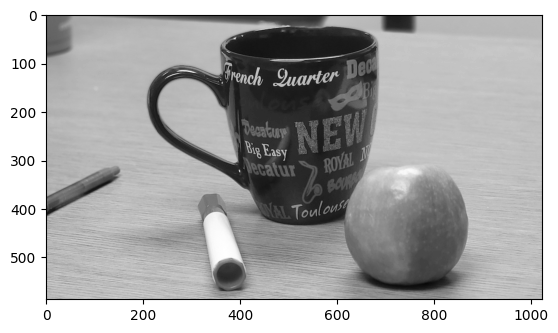

Image size:  (1024, 587)
torch.Size([1, 587, 1024])


In [2]:
# Here we justshow the image to be convolve, and we converti into a tensor
# format for Pytorch to use it

plt.imshow(img,cmap="gray")   # Print the image.
plt.show()

print('Image size: ', np.size(img))# Print the image size before converting it
                                   # into tensor format
imgT = T.ToTensor()(img)           # Conversion into tensor format
print(imgT.size())                 # Print the tensor dimensions
# We can read the result (1, 587, 1024) as: this is a single image with
# 587 rows and 1024 columns. The first dimension, hence, tells us how many
# images are present in the tensor, which is used as a way to store a batch of
# them.

## Image convolution

Here we define a kernel as

$$
\text{kernel} = \left(\begin{array}{rrr}
-1& -1& -1\\ -1 & 8 & -1\\ -1&-1& -1
\end{array} \right)
$$

and we have to set the bias as 0.


 We first define the convolution object.
 The usage of this class is

 __torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)__

 We define __in_channels =1__, __out_channels =1__, __kernel_size = 3__. The kernel size is irrelevant here because it is explicitly set as a $3 \times 3$ matrix later.

The rest of parameters are set by default. In  particular. stride and padding are set to 0 and 1, so a regular convolution with no padding or stride is executed.

Source: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

The size of the output is smaller:  torch.Size([1, 585, 1022])


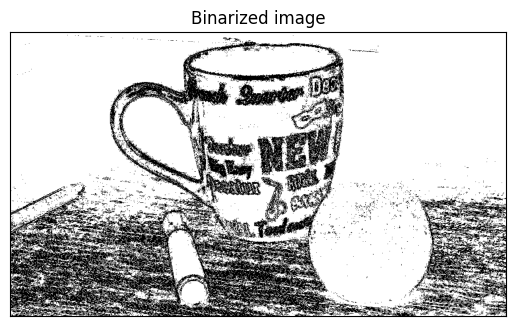

In [3]:
# We first define the convolution object. One input channel, one output channel and kernel size of 3 x 3
conv = torch.nn.Conv2d(1, 1, 3)

# Kernel fixed as written above. The bias is simply set to zero. Note that the
# format must be FloatTensor.
weight=torch.FloatTensor([[[[-1, -1, -1],[ -1,  8,  -1],[-1,  -1, -1]]]])
bias=torch.FloatTensor([0])
# Then, these tensors must be defined as convolution parameters. They cannot be
# differentiated, so we must set requires_grad=False
conv.weight =torch.nn.Parameter(weight,requires_grad=False)
conv.bias =torch.nn.Parameter(bias,requires_grad=False)


# Here the convolution operation is applied to the image ]
output = conv(imgT)
print('The size of the output is smaller: ', output.size())
print_images(output)

## Padding and stride


The size of the output is smaller:  torch.Size([1, 147, 256])


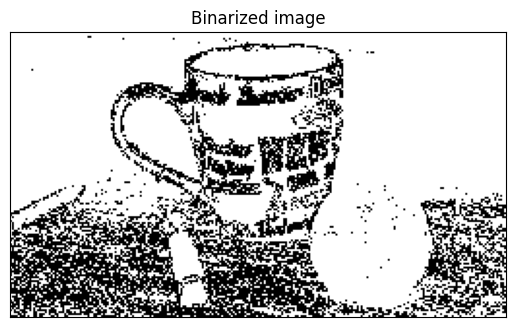

In [4]:
conv = torch.nn.Conv2d(1, 1, 1,padding=0,stride=4)

# Kernel and bias have to be re-entered
conv.weight =torch.nn.Parameter(weight,requires_grad=False)
conv.bias =torch.nn.Parameter(bias,requires_grad=False)

# apply convolution operation on image
output = conv(imgT)

# Here the convolution operation is applied to the image ]
output = conv(imgT)
print('The size of the output is smaller: ', output.size())
print_images(output)
